In [84]:
import pandas as pd

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [85]:
google_play_df = pd.read_csv("data/googleplaystore.csv")
google_play_df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Let's begin exploring and understandsing our data. 

In [86]:
google_play_df.shape

(10841, 13)

In [87]:
google_play_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Getting familiar with our 'column names'

In [88]:
google_play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Question 1: 
Which app category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

To better understand the data, let's first find out how many unique categories there are:

In [89]:
unique_categories = google_play_df.Category.unique()
unique_categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

And how many

In [90]:
len(unique_categories)

34

# Cleaning the Data

Encountered Error: "DataError: No numeric types to aggregate" 

In [91]:
#to fix it:

# We check if all our values are numeric:

google_play_df.Reviews.str.isnumeric().sum()

10840

We have a total number of n = 10841 Reviews and as we see above, only 10840 numeric values. We should find the non-numeric value and change it so we could iterate over the Reviews.

In [92]:
google_play_df[~google_play_df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [102]:
google_play_df = google_play_df.drop(google_play_df.index[10472])

In [103]:
google_play_df["Reviews"] = google_play_df["Reviews"].replace("3.0M", 3000000)

In [104]:
google_play_df.iloc[10472, google_play_df.columns.get_loc('Reviews')] = "3000000"

Now let's find out the data type for our "Reviews" values.

In [105]:
print(google_play_df["Reviews"].tail())

10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, dtype: object


It's just reading it as 'object', which doesn't tell us very much. To be sure let's apply a function to change it to numeric type.

In [106]:
google_play_df['Reviews']=pd.to_numeric(google_play_df['Reviews'])

## Now to finally answer our question, we measure our "Reviews" using the median.

In [110]:
# Which Categories have the best Ratings

best_ratings = google_play_df.groupby(["Category"])["App","Rating"].median().reset_index()
best_ratings = best_ratings.sort_values("Rating", ascending=False)
print(best_ratings)

               Category  Rating
3   BOOKS_AND_REFERENCE     4.5
10               EVENTS     4.5
15   HEALTH_AND_FITNESS     4.5
0        ART_AND_DESIGN     4.4
5                COMICS     4.4
8             EDUCATION     4.4
23      PERSONALIZATION     4.4
22            PARENTING     4.4
14                 GAME     4.4
20              MEDICAL     4.3
30     TRAVEL_AND_LOCAL     4.3
28               SPORTS     4.3
27               SOCIAL     4.3
26             SHOPPING     4.3
25         PRODUCTIVITY     4.3
24          PHOTOGRAPHY     4.3
16       HOUSE_AND_HOME     4.3
1     AUTO_AND_VEHICLES     4.3
13       FOOD_AND_DRINK     4.3
12              FINANCE     4.3
11               FAMILY     4.3
6         COMMUNICATION     4.3
4              BUSINESS     4.3
2                BEAUTY     4.3
32              WEATHER     4.3
17   LIBRARIES_AND_DEMO     4.2
18            LIFESTYLE     4.2
19  MAPS_AND_NAVIGATION     4.2
21   NEWS_AND_MAGAZINES     4.2
9         ENTERTAINMENT     4.2
29      

/home/user/anaconda3/envs/flatiron/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Top 5 Best Rated Categories')

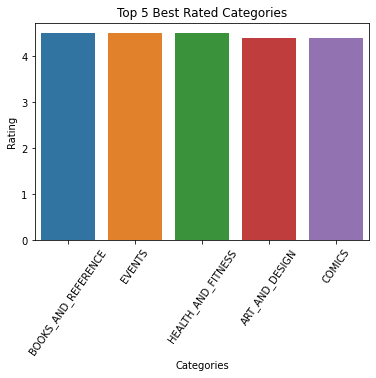

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

graph1 = sns.barplot(best_ratings[:5].Category, best_ratings[:5].Rating)
graph1.set_xlabel("Categories")
graph1.set_ylabel("Rating")
graph1.set_xticklabels(graph1.get_xticklabels(),rotation=55)
graph1.set_autoscale_on
graph1.set_title("Top 5 Best Rated Categories")



## Conclusion
BOOKS_AND_REFERENCE, HEALTH_AND_FITNESS and EVENTS are the categories with the "best ratings" according to our analysis. Based on the median parameter.

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

# For this next section, choose a Category of playstore apps

## Category Chosen: [insert here]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

In [50]:
google_play_df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

# Question 4: You choose what you want to investigate

In [51]:
google_play_reviews_df = pd.read_csv("data/googleplaystore_user_reviews.csv")
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
